In [1]:
# Importing libraries
from mibian import BS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 20.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# Fetching data and initializing the IV column
call_microsoft = pd.read_csv("Call_microsoft.csv", decimal=",",delimiter=';')
call_microsoft['IV'] = 0
print(call_microsoft.head())

   spot_price  strike  call price  time in days  IV
0         215     190       26.60            23   0
1         215     195       21.80            23   0
2         215     200       17.45            23   0
3         215     205       13.15            23   0
4         215     210        9.40            23   0


In [4]:
call_microsoft

,spot_price,strike,call price,time in days,IV
0,215,190,26.600,23,0
1,215,195,21.800,23,0
2,215,200,17.450,23,0
3,215,205,13.150,23,0
4,215,210,9.400,23,0
...,...,...,...,...,...
86,215,230,10.625,156,0
87,215,235,8.950,156,0
88,215,240,7.575,156,0
89,215,245,6.225,156,0


In [5]:
 ## Calcul de la volatilité implicite.  
for row in range(0,len(call_microsoft)):
    underlyingPrice = call_microsoft.iloc[row]['spot_price']
    strikePrice = call_microsoft.iloc[row]['strike']
    interestRate = 0
    daysToExpiration = call_microsoft.iloc[row]['time in days']
    
    callPrice = call_microsoft.iloc[row]['call price']
    
    result = BS([underlyingPrice, strikePrice, interestRate, daysToExpiration],
                callPrice = callPrice)
    
    call_microsoft.iloc[row,call_microsoft.columns.get_loc('IV')] = result.impliedVolatility
    

In [6]:
call_microsoft['date']= "27/11/2020"
print(call_microsoft)

    spot_price  strike  call price  time in days         IV        date
0          215     190      26.600            23  44.921875  27/11/2020
1          215     195      21.800            23  40.039062  27/11/2020
2          215     200      17.450            23  37.292480  27/11/2020
3          215     205      13.150            23  33.569336  27/11/2020
4          215     210       9.400            23  31.250000  27/11/2020
..         ...     ...         ...           ...        ...         ...
86         215     230      10.625           156  29.502869  27/11/2020
87         215     235       8.950           156  29.235840  27/11/2020
88         215     240       7.575           156  29.184341  27/11/2020
89         215     245       6.225           156  28.800964  27/11/2020
90         215     250       5.200           156  28.808594  27/11/2020

[91 rows x 6 columns]


In [11]:
# Plotting the volatility smile
def Plot_smile(date):
    option_data = call_microsoft[call_microsoft['date'] == date]
    plt.plot(option_data['strike'],option_data['IV'])
    plt.legend(option_data['date'])
    plt.ylabel('Implied Volatility')
    plt.xlabel('Strike Price')           
    plt.show()

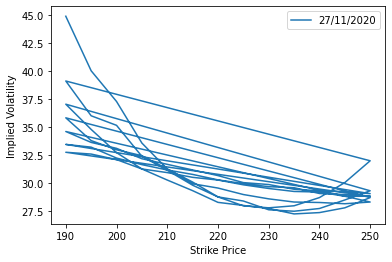

In [12]:
Plot_smile("27/11/2020")

In [8]:
# Taking input date and calling the Plot_smile() function
def Take_input():
    smile_date = raw_input("Enter the date for plotting Volatility Smile in the format dd-mm-yyyy: ")
    date_check = 0
    for date in call_microsoft['date']:
        if date == smile_date:
            Plot_smile(smile_date)
            break
    else:
        print "\nKindly enter a valid date.\n"
        Take_input()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("\nKindly enter a valid date.\n")? (<ipython-input-8-0a04b6a25edf>, line 10)